# Hudson Arney
## Problem Set - Week 4
### KNN


### Problem 1: Practice KNN by hand

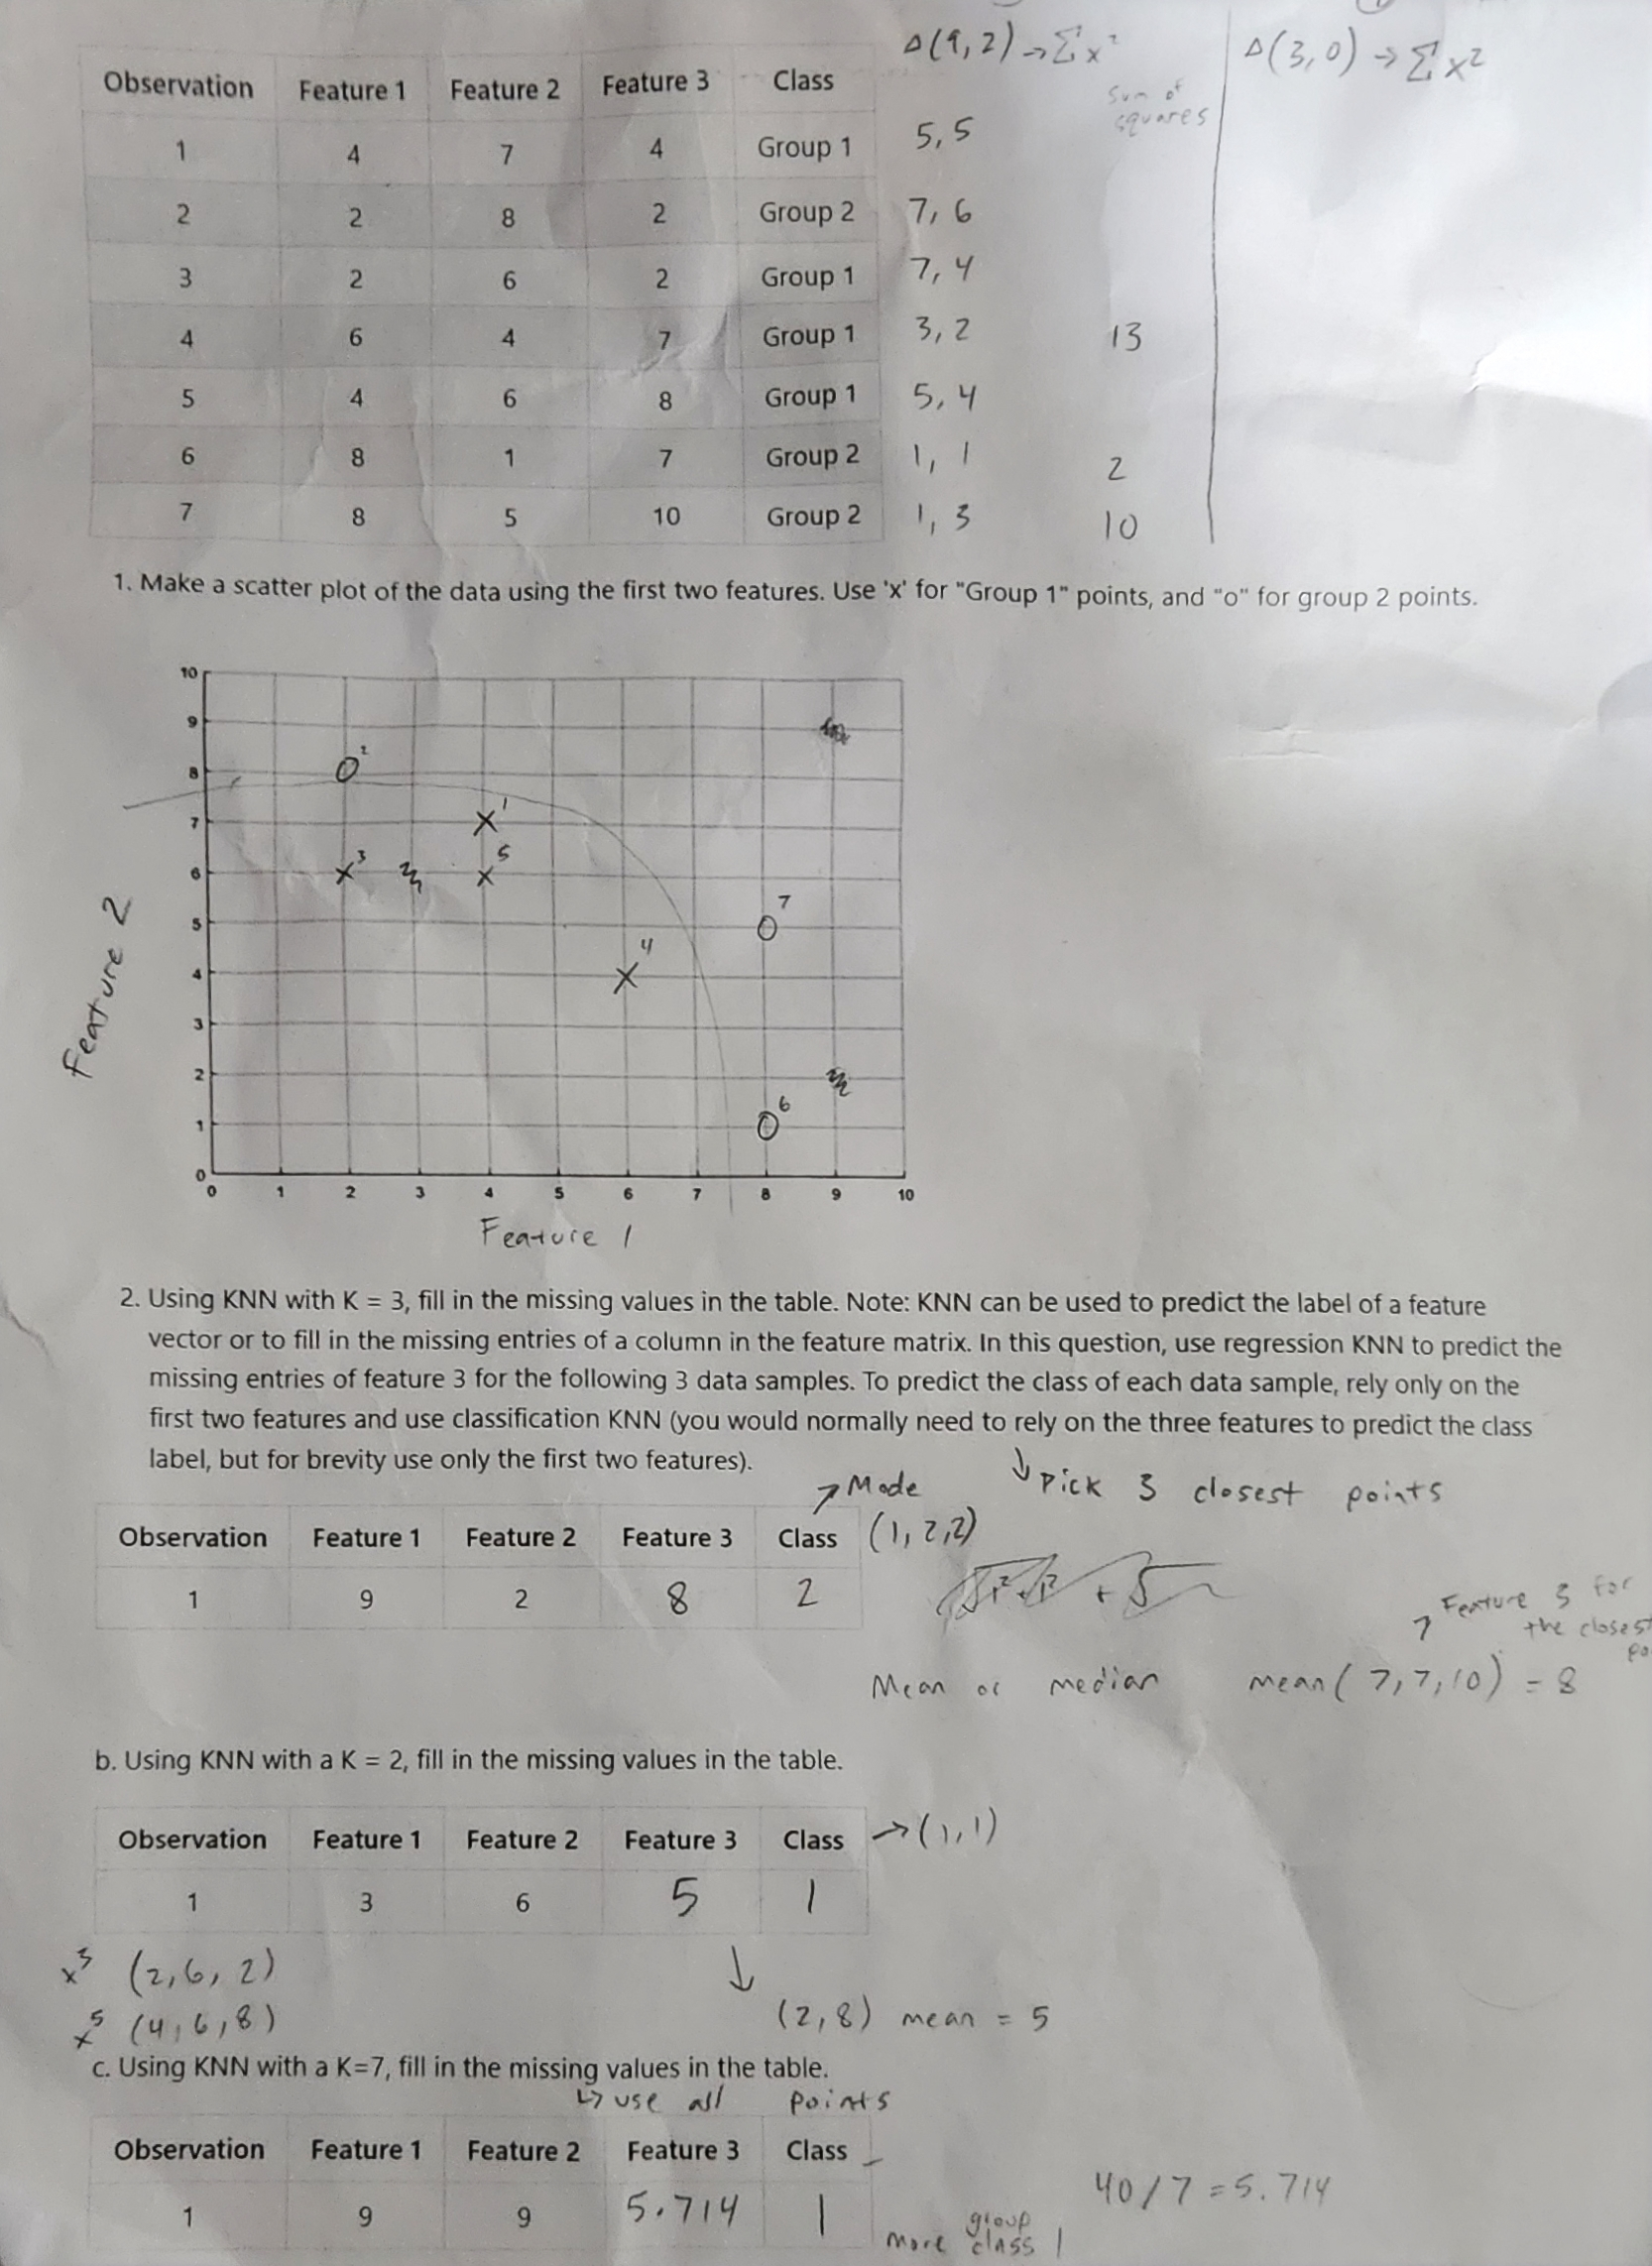

### Problem 2: The bias-variance tradeoff

1. How do you expect the complexity of a KNN classifier to change if k increases? In other words, as we increase k, will the decision boundary become simpler and smoother or will it have more angles and curves?
- I would expect as K increases, the decision boundary becomes smoother/simpler because the model will start considering more potential neighbors.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

2.

In [2]:
file_path = "C:/Users/arneyh/CSC 5601 - Theory of Machine Learning/Assignments/Week 4/Data/"
diabetes = pd.read_csv(file_path + 'diabetes.csv')

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = diabetes.drop(columns=("Outcome"))
X = np.asarray(diabetes)
y = np.asarray(diabetes["Outcome"])

3.

In [5]:
KNN = KNeighborsClassifier(n_neighbors=5)

4.

In [6]:
results = cross_validate(KNN, X, y=y, return_train_score=True)
print("Average test score:", np.average(results["test_score"]))
print("Average train score:", np.average(results["train_score"]))

Average test score: 0.7252864782276547
Average train score: 0.7985058658404174


5.

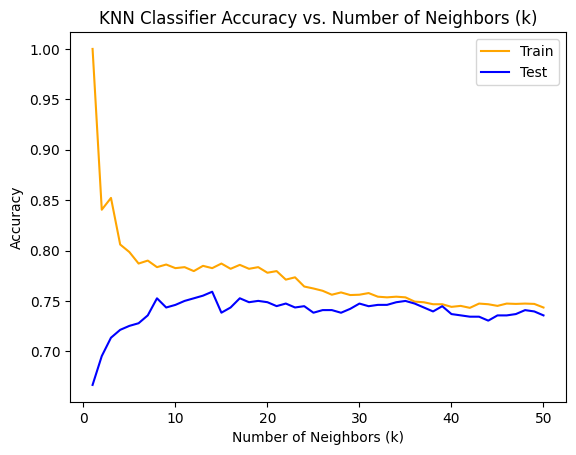

In [7]:
train_scores_avg = []
test_scores_avg = []

for k in range(1, 51):
    KNN = KNeighborsClassifier(n_neighbors=k)
    results = cross_validate(KNN, X, y, return_train_score=True)
    train_scores_avg.append(np.average(results["train_score"]))
    test_scores_avg.append(np.average(results["test_score"]))

plt.plot(range(1, 51), train_scores_avg, color="orange", label="Train")
plt.plot(range(1, 51), test_scores_avg, color="blue", label="Test")
plt.title('KNN Classifier Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

6. Can you spot where the model has high variance (overfitting) and where it has low variance?
- Overfitting/High Variance takes place when K is close to 1. This is apparent since the training accuracy is near 100% accuracy but the testing accuracy is lower than 70%. As K grows, the variance decreases and the average accuracy converges towards 0.75.

### Problem 3: The curse of dimensionality

1. If $l$ is the length of the subinterval, the fraction of observations on that dimension $f$ that fall in $l$ would be: $\frac{l}{1}$ $ = f$
    - $ f = l$

Meaning the fraction of available observations used for prediction is equal to the length of the sub-interval.

2. By adding two features it would become:
    - $ f = \frac{l^2}{1^2}$

    - $ f = l^2$

3. By adding three features it would become:
    - $ f = \frac{l^3}{1^3}$

    - $ f = l^3$

    This follows a pattern where the dimension of l increases by one for each feature which can be denoted by:
    - $ f = l^p$

    Where $p$ is the number of features

4. I would expect the graph to go up expontentially

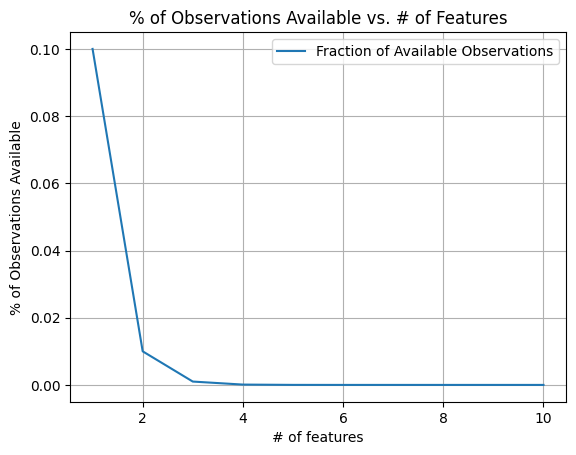

In [8]:
l = 0.1
N = np.arange(1,11)
percent_observed = []

for i in N:
    percent_observed.append((l**i))
plt.plot(N, percent_observed, label='Fraction of Available Observations')

plt.title('% of Observations Available vs. # of Features')
plt.xlabel('# of features')
plt.ylabel('% of Observations Available')
plt.grid(True)
plt.legend()
plt.show()

A disadvantage of KNN in a situation where $p$ is large is that finding a sufficient number of nearest neighbors becomes challenging, as there are likely fewer observations that are close to the new data point.

What is the length of each side of the hypercube? How does the length change as $p$ increases? Again show a plot to explain your answer. 

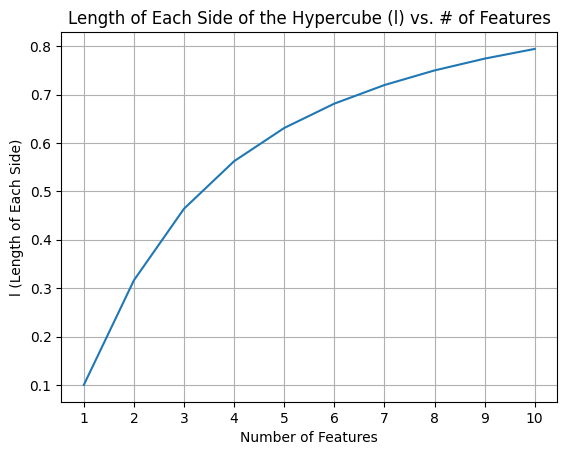

In [9]:
p_values = np.arange(1, 11)

val_list = []
for i in p_values:
    val_list.append(l**(1/i))

plt.plot(p_values, val_list)
plt.title('Length of Each Side of the Hypercube (l) vs. # of Features')
plt.xlabel('Number of Features')
plt.ylabel('l (Length of Each Side)')
plt.grid(True)
plt.xticks(np.arange(1, 11, step=1))
plt.show()

Can you argue that when $p$ is large, what KNN assumes as a near neighbor to a data point, might not actually be similar to this data point?
- As hypercube used to define the neighborhood of a data point expands, yet the density of data points within this hypercube decreases due to the curse of dimensionality. Consequently, what KNN assumes as "near neighbors" to a data point might not actually be similar, leading to less accurate predictions